In [1]:
import pandas as pd
import numpy as np

In [2]:
! pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=4c53e819b8d997720d50d3da9ee5e98926ba82638b6f1674dff1e4d530def9ac
  Stored in directory: /root/.cache/pip/wheels/d1/fc/57/f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mord import OrdinalRidge
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
url = "https://raw.githubusercontent.com/AnnaNebuko/ABD-PRJ-25-2team-HAPPINESS/main/data_cleaned.csv"
df = pd.read_csv(url)

In [11]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,idno,agea,rlgdgr,polintr,sclmeet,happy,cntry,nwspol,pplfair,health,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
0,50030,21.0,0.0,2.0,7.0,9.0,AT,90.0,0.0,2.0,...,2.0,2.0,6.0,6.0,4.0,1.0,1.0,2.0,7.0,10.0
1,50057,53.0,8.0,2.0,4.0,9.0,AT,30.0,9.0,1.0,...,4.0,3.0,7.0,5.0,8.0,4.0,1.0,6.0,6.0,5.0
2,50106,78.0,6.0,3.0,6.0,7.0,AT,15.0,6.0,3.0,...,2.0,3.0,5.0,6.0,9.0,3.0,2.0,4.0,6.0,5.0
3,50145,64.0,1.0,2.0,5.0,9.0,AT,60.0,3.0,2.0,...,1.0,3.0,6.0,8.0,8.0,5.0,1.0,6.0,8.0,9.0
4,50158,59.0,3.0,2.0,6.0,8.0,AT,120.0,8.0,1.0,...,3.0,3.0,3.0,5.0,7.0,5.0,1.0,4.0,3.0,3.0


In [12]:
df['happy'] = df['happy'].astype(int)

X = df.drop(['happy', 'idno'], axis=1)
y = df['happy']

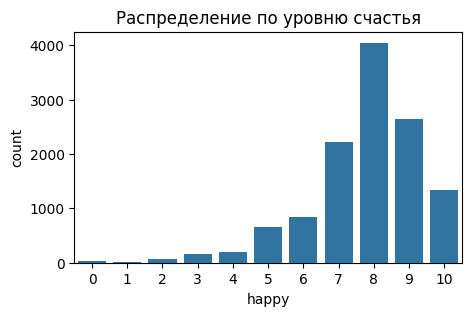

In [15]:
fig = plt.figure(figsize=(5, 3))

sns.countplot(data=df, x='happy')
plt.title('Распределение по уровню счастья')
plt.show()

In [16]:
# закодируем категориальные признаки
X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Порядковая регрессия

**OrdinalRidge**

In [18]:
# cоздание и обучение модели порядковой регрессии
model = OrdinalRidge()
model.fit(X_train, y_train)

# предсказание
y_pred = model.predict(X_test).round().astype(int)

mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"Accuracy: {accuracy:.2f}")

MSE: 1.62
Accuracy: 0.37


In [19]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        33
           4       0.15      0.05      0.07        41
           5       0.25      0.11      0.15       133
           6       0.22      0.28      0.25       168
           7       0.30      0.39      0.34       444
           8       0.43      0.54      0.48       810
           9       0.41      0.41      0.41       530
          10       0.48      0.06      0.11       268

    accuracy                           0.37      2449
   macro avg       0.20      0.17      0.16      2449
weighted avg       0.37      0.37      0.35      2449



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Модель OrdinalRidge показала низкую способность предсказывать уровень счастья

In [20]:
# добавим GridSearch

from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid = GridSearchCV(OrdinalRidge(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
model = grid.best_estimator_

y_pred = model.predict(X_test).round().astype(int)

mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Лучшие параметры: {'alpha': 10.0}
MSE: 1.62
Accuracy: 0.37


Модель GridSearchCV показала низкую способность предсказывать уровень счастья

**LogisticAT**

In [21]:
from mord import LogisticAT
model = LogisticAT(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test).round().astype(int)

mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"Accuracy: {accuracy:.2f}")

MSE: 1.59
Accuracy: 0.39


### OrderedModel

In [22]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [24]:
# Создание и обучение модели
ordered_model = OrderedModel(y_train, X_train_scaled_df, distr='logit')
results_prob = ordered_model.fit(method='bfgs')

print(results_prob.summary())

Optimization terminated successfully.
         Current function value: 1.516392
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
                             OrderedModel Results                             
Dep. Variable:                  happy   Log-Likelihood:                -14850.
Model:                   OrderedModel   AIC:                         2.982e+04
Method:            Maximum Likelihood   BIC:                         3.027e+04
Date:                Sat, 14 Jun 2025                                         
Time:                        13:58:02                                         
No. Observations:                9793                                         
Df Residuals:                    9731                                         
Df Model:                          52                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [25]:
# Создаем DataFrame из параметров модели
df_results = pd.DataFrame({
    'coef': results_prob.params,
    'std_err': results_prob.bse,
    'z_value': results_prob.tvalues,
    'p_value': results_prob.pvalues,
    'ci_lower': results_prob.conf_int()[0],
    'ci_upper': results_prob.conf_int()[1]
})

# Добавляем названия переменных
df_results.index = results_prob.model.exog_names


df_results[:-10].sort_values('coef').head(10)

,coef,std_err,z_value,p_value,ci_lower,ci_upper
health,-0.328091,0.023210,-14.135876,2.282768e-45,-0.373581,-0.282601
fltdpr,-0.273538,0.023679,-11.551928,7.218288e-31,-0.319948,-0.227128
cntry_GR,-0.250812,0.025074,-10.003058,1.477618e-23,-0.299956,-0.201669
fltlnl,-0.235138,0.021927,-10.723516,7.894374e-27,-0.278114,-0.192161
hincfel,-0.205114,0.021871,-9.378321,6.703141e-21,-0.247981,-0.162248
cntry_FR,-0.163840,0.027287,-6.004332,1.921208e-09,-0.217322,-0.110359
iphlppla,-0.132409,0.020417,-6.485188,8.862142e-11,-0.172425,-0.092392
cntry_CY,-0.132108,0.022574,-5.852267,4.849179e-09,-0.176353,-0.087864
gndr_1,-0.118666,0.027597,-4.299875,1.708943e-05,-0.172755,-0.064576
impfuna,-0.091824,0.021684,-4.234656,2.289014e-05,-0.134323,-0.049324


In [26]:
df_results[:-10].sort_values('coef', ascending=False).head(10)

,coef,std_err,z_value,p_value,ci_lower,ci_upper
enjlf,0.652353,0.022734,28.695619,4.326975e-181,0.607796,0.696909
stfeco,0.250904,0.026518,9.461778,3.027500e-21,0.198930,0.302878
atchctr,0.221685,0.021859,10.141708,3.607360e-24,0.178842,0.264527
trstplc,0.169131,0.027186,6.221306,4.930336e-10,0.115848,0.222414
pplfair,0.129676,0.021671,5.983830,2.179505e-09,0.087202,0.172151
agea,0.124997,0.025307,4.939140,7.846803e-07,0.075395,0.174599
hhmmb,0.123538,0.021074,5.862036,4.572256e-09,0.082233,0.164843
cptppola,0.107342,0.025862,4.150623,3.315716e-05,0.056654,0.158030
stfedu,0.081802,0.024669,3.315952,9.133137e-04,0.033451,0.130153
sclmeet,0.079174,0.020258,3.908326,9.293776e-05,0.039469,0.118878


Коэффициенты показывают, как изменение предиктора на 1 единицу влияет на логарифм шансов (log-odds) оказаться в более высокой категории счастья.

- Самые значимые положительные факторы (p<0.05):

enjlf (0.652) - Удовольствие от жизни

stfeco (0.251) - Удовлетворенность экономикой

atchctr (0.221) - Привязанность к стране

trstplc (0.169) - Доверие полиции

pplfair (0.13) - Вера в честность людей

- Самые значимые отрицательные факторы:

health (-0.328) - Плохое здоровье

fltdpr (-0.273) - Чувство депрессии

cntry_GR (-0.25) - Проживание в Греции

fltlnl (-0.235) - Чувство одиночества

hincfel (-0.205) - Финансовые трудности

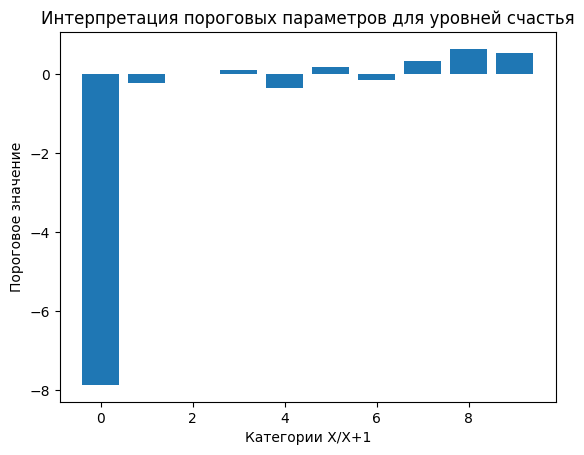

In [27]:
# Интерпретация пороговых параметров
thresholds = results_prob.params[-10:]  # Последние 10 параметров — пороги
plt.bar(range(10), thresholds)
plt.title('Интерпретация пороговых параметров для уровней счастья')
plt.xlabel("Категории X/X+1")
plt.ylabel("Пороговое значение")
plt.show()

In [28]:
thresholds

,0
0/1,-7.872443
1/2,-0.229005
2/3,0.001598
3/4,0.100544
4/5,-0.353441
5/6,0.177699
6/7,-0.136964
7/8,0.342326
8/9,0.639905
9/10,0.524313


Самый резкий переход:

0/1 = -7.87 — огромный отрицательный порог. Это означает, что люди очень редко выбирают категорию 0 (крайняя несчастливость), и даже минимальные значения предикторов "переводят" их в категорию 1.

8/9 = 0.64 — самый большой положительный скачок. Переход от 8 к 9 требует значительно более высоких значений предикторов (например, очень сильного удовольствия от жизни enjlf).

Самые значимые пороги (p < 0.001):

4/5 = -0.35 — барьер между "умеренно несчастливыми" (4) и "нейтральными" (5).

5/6 = 0.17 — переход от "нейтральных" (5) к "слегка счастливым" (6).

7/8 = 0.34 и 8/9 = 0.640 — требуют максимальных усилий для перехода между высокими уровнями счастья.

Незначимые пороги (p > 0.05): 1/2, 2/3, 3/4. Это означает, что разница между этими категориями слабо выражена, и модель плохо их разделяет.

In [29]:
# Сделаем предсказание вероятности уровня счастья
predicted = results_prob.model.predict(results_prob.params, X_test_scaled)

# Выберем наиболее высокую вероятность уровня
y_pred = [np.argmax(x) for x in predicted]

print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy:0.3875051041241323
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        13
           3       0.31      0.12      0.17        33
           4       0.00      0.00      0.00        41
           5       0.26      0.21      0.23       133
           6       0.00      0.00      0.00       168
           7       0.28      0.27      0.27       444
           8       0.42      0.72      0.53       810
           9       0.42      0.33      0.37       530
          10       0.48      0.15      0.23       268

    accuracy                           0.39      2449
   macro avg       0.29      0.18      0.19      2449
weighted avg       0.35      0.39      0.34      2449



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Без агрегации уровня счастья модель показывает низкую способность предсказывать таргет.


In [30]:
# Объединим уровень счастья в категории
df['happiness_group'] = pd.cut(
    df['happy'],
    bins=[-1, 4, 8, 10],
    labels=[0, 1, 2]  # Границы: 0-'low', 1-'medium', 2-'high'
)

print(df['happiness_group'].value_counts(normalize=True))

happiness_group
1    0.634700
2    0.326091
0    0.039209
Name: proportion, dtype: float64


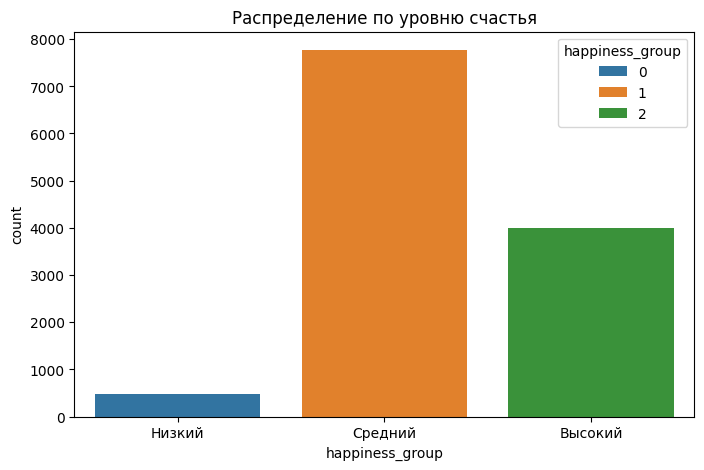

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='happiness_group', hue='happiness_group')
plt.title('Распределение по уровню счастья')
plt.xticks(ticks=[0, 1, 2], labels=['Низкий', 'Средний', 'Высокий'])
plt.show()

In [ ]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, df['happiness_group'], test_size=0.2, stratify=df['happiness_group'], random_state=42)

scaler = StandardScaler()
X_train_scaled_cat = scaler.fit_transform(X_train_cat)
X_test_scaled_cat = scaler.transform(X_test_cat)

X_train_scaled_cat_df = pd.DataFrame(X_train_scaled_cat, columns=X.columns, index=X_train_cat.index)
X_test_scaled_cat_df = pd.DataFrame(X_test_scaled_cat, columns=X.columns, index=X_test_cat.index)



In [ ]:
# Создание и обучение модели с категориями

ord_model_cat = OrderedModel(y_train_cat, X_train_scaled_cat_df, distr='logit')
results_cat = ord_model_cat.fit(method='bfgs')

print(results_cat.summary())


Optimization terminated successfully.
         Current function value: 0.616211
         Iterations: 40
         Function evaluations: 41
         Gradient evaluations: 41
                             OrderedModel Results                             
Dep. Variable:        happiness_group   Log-Likelihood:                -6034.6
Model:                   OrderedModel   AIC:                         1.218e+04
Method:            Maximum Likelihood   BIC:                         1.257e+04
Date:                Sat, 14 Jun 2025                                         
Time:                        12:03:38                                         
No. Observations:                9793                                         
Df Residuals:                    9739                                         
Df Model:                          52                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [ ]:
# Создаем DataFrame из параметров модели
df_results_cat = pd.DataFrame({
    'coef': results_cat.params,
    'std_err': results_cat.bse,
    'z_value': results_cat.tvalues,
    'p_value': results_cat.pvalues,
    'ci_lower': results_cat.conf_int()[0],
    'ci_upper': results_cat.conf_int()[1]
})

# Добавляем названия переменных
df_results_cat.index = results_cat.model.exog_names



In [ ]:
# Посмотрим веса статзначимых предикторов
mask = df_results_cat['p_value'] < 0.05

predictors = df_results_cat[mask][:-2].sort_values('coef', ascending=False)

predictors

,coef,std_err,z_value,p_value,ci_lower,ci_upper
enjlf,0.656943,0.028750,22.850087,1.458497e-115,0.600594,0.713292
atchctr,0.240908,0.027677,8.704131,3.200180e-18,0.186661,0.295155
stfeco,0.210297,0.032628,6.445218,1.154344e-10,0.146347,0.274247
hhmmb,0.155622,0.026410,5.892549,3.802843e-09,0.103859,0.207384
trstplc,0.138147,0.033152,4.167109,3.084875e-05,0.073171,0.203123
agea,0.134367,0.031808,4.224309,2.396750e-05,0.072025,0.196710
stfedu,0.132542,0.030143,4.397165,1.096740e-05,0.073464,0.191621
cntry_DE,0.103368,0.035750,2.891399,3.835307e-03,0.033299,0.173436
cptppola,0.094457,0.032095,2.943022,3.250251e-03,0.031552,0.157363
pplfair,0.091553,0.026500,3.454870,5.505584e-04,0.039615,0.143492


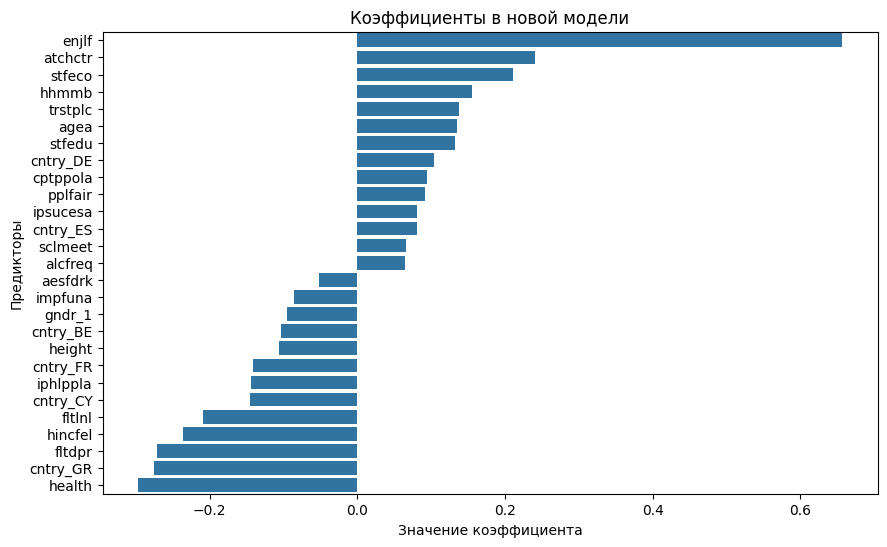

In [ ]:
# Визуализация изменений
plt.figure(figsize=(10,6))
sns.barplot(x=predictors['coef'], y=predictors.index)
plt.title('Коэффициенты в новой модели')
plt.xlabel('Значение коэффициента')
plt.ylabel('Предикторы')
plt.show()

Log-Likelihood: -6034.6 (лучше, чем в исходной модели с 10 уровнями)

Пороговые значения:

low/medium: -4.2374 (p<0.05) — резкий переход между низким и средним уровнем

medium/high: 1.6671 (p<0.05) — значимый, но менее выраженный скачок к высокому уровню

In [ ]:
columns_no_stat = df_results_cat[df_results_cat['p_value'] >= 0.05].index.to_list()
print(f'Признаки, не имеющие статзначимость:\n {columns_no_stat}')


Признаки, не имеющие статзначимость:
 ['rlgdgr', 'polintr', 'nwspol', 'dscrgrp', 'pray', 'impdiffa', 'impsafea', 'slprl', 'dosprt', 'cgtsmok', 'weighta', 'fnsdfml', 'cnfpplh', 'paccnt', 'emplrel', 'uempla', 'actrolga', 'trstprl', 'trstlgl', 'trstplt', 'vote', 'stfdem', 'cntry_CH', 'cntry_FI', 'cntry_GB']


In [ ]:
predicted_cat = results_cat.model.predict(results_cat.params, np.array(X_test_scaled_cat_df))
y_pred_cat = [np.argmax(x) for x in predicted_cat]


print(f'Accuracy:{accuracy_score(y_test_cat, y_pred_cat)}\n')
print(classification_report(y_test_cat, y_pred_cat))

Accuracy:0.7109024091465904

              precision    recall  f1-score   support

           0       0.58      0.15      0.23        96
           1       0.73      0.86      0.79      1554
           2       0.65      0.49      0.56       799

    accuracy                           0.71      2449
   macro avg       0.66      0.50      0.53      2449
weighted avg       0.70      0.71      0.69      2449



При агрегации категорий счастья, модель OrderedModel показывает лучший результат. Протестируем другие модели

**Разделим happy на меньшее кол-во категорий**

In [ ]:
bins = [0, 3, 7, 10]
labels = ['Low', 'Medium', 'High']

df['happy_grouped'] = pd.cut(df['happy'], bins=bins, labels=labels)

df = df.dropna(subset=['happy_grouped']).copy()

print(df['happy_grouped'].value_counts())

happy_grouped
High      8040
Medium    3928
Low        251
Name: count, dtype: int64


In [ ]:
X = df.drop(['happy', 'happy_grouped', 'happiness_group'], axis=1)
y = df['happy_grouped']

category_order = ['Low', 'Medium', 'High']
y = pd.Categorical(y, categories=category_order, ordered=True).codes

X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model_ridge = OrdinalRidge(alpha=1.0)
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ridge)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

print(f"OrdinalRidge MSE: {mse:.2f}")
print(f"OrdinalRidge Accuracy: {accuracy_ridge:.2f}")

OrdinalRidge MSE: 0.25
OrdinalRidge Accuracy: 0.75


In [ ]:
model_logit = LogisticAT(alpha=0.1)
model_logit.fit(X_train, y_train)

y_pred_logit = model_logit.predict(X_test)

mse = mean_squared_error(y_test, y_pred_logit)
accuracy = accuracy_score(y_test, y_pred_logit)

print(f"LogisticAT MSE: {mse:.2f}")
print(f"LogisticAT Accuracy: {accuracy:.2f}")

LogisticAT MSE: 0.25
LogisticAT Accuracy: 0.76


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_logit.coef_
}).sort_values('Coefficient', ascending=False)

print(coef_df.head(10))
print("\n")
print(coef_df.tail(10))

     Feature  Coefficient
18     enjlf     0.608138
40    stfeco     0.287072
8    atchctr     0.207163
6    pplfair     0.144787
37   trstplc     0.140436
1       agea     0.133526
46  cntry_DE     0.130057
12     hhmmb     0.129329
42    stfedu     0.098676
48  cntry_FI     0.096720


     Feature  Coefficient
35   trstprl    -0.100641
14   impfuna    -0.106592
16  iphlppla    -0.123611
49  cntry_FR    -0.135555
52    gndr_1    -0.142211
51  cntry_GR    -0.214718
31   hincfel    -0.236584
20    fltlnl    -0.237496
19    fltdpr    -0.254024
7     health    -0.287091


In [ ]:
# попробуем убрать enjlf

X = df.drop(['happy', 'happy_grouped', 'enjlf', 'happiness_group'], axis=1)
y = df['happy_grouped']

category_order = ['Low', 'Medium', 'High']
y = pd.Categorical(y, categories=category_order, ordered=True).codes

X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model_ridge = OrdinalRidge(alpha=1.0)
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ridge)
accuracy = accuracy_score(y_test, y_pred_ridge)

print(f"OrdinalRidge MSE: {mse:.2f}")
print(f"OrdinalRidge Accuracy: {accuracy_ridge:.2f}")

OrdinalRidge MSE: 0.28
OrdinalRidge Accuracy: 0.75


In [ ]:
model_logit = LogisticAT(alpha=0.1)
model_logit.fit(X_train, y_train)

y_pred_logit = model_logit.predict(X_test)

mse = mean_squared_error(y_test, y_pred_logit)
accuracy = accuracy_score(y_test, y_pred_logit)

print(f"LogisticAT MSE: {mse:.2f}")
print(f"LogisticAT Accuracy: {accuracy:.2f}")

LogisticAT MSE: 0.28
LogisticAT Accuracy: 0.73


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_logit.coef_
}).sort_values('Coefficient', ascending=False)

print(coef_df.head(10))
print("\n")
print(coef_df.tail(10))

     Feature  Coefficient
39    stfeco     0.291942
8    atchctr     0.207040
45  cntry_DE     0.157296
6    pplfair     0.153495
36   trstplc     0.149873
1       agea     0.149736
12     hhmmb     0.129008
42  cntry_BE     0.120651
2     rlgdgr     0.114043
46  cntry_ES     0.107894


     Feature  Coefficient
44  cntry_CY    -0.074062
34   trstprl    -0.094226
16  iphlppla    -0.136859
51    gndr_1    -0.146473
14   impfuna    -0.159691
50  cntry_GR    -0.207992
30   hincfel    -0.249850
19    fltlnl    -0.299336
7     health    -0.339354
18    fltdpr    -0.375195


#**XGBClassifier**

1.   На данный момент лучше всего справляется с задачей LogisticAT (0,76). Давайте посмотрим, каой результат будет у деревьев решений (или их ансамблями, например, Random Forest/Gradient Boosting).
2.    Проблема: Random Forest не учитывает порядок в Y, но можно использовать RandomForestClassifier с one-hot кодированием (потеря информации о порядке)
1.   Более строгий порог для "низкого" счастья (только до 3 баллов включительно) показал 0,742 Accuracy vs Более мягкое разделение: "низкий" уровень включает нейтральные оценки (4 балла) показал 0,72 Accuracy



In [ ]:
# Подготовка данных

bins =  [-1, 3, 7, 10] #Лучше Accuracy
# bins = [-1, 4, 8, 10]
labels = ['Low', 'Medium', 'High']
df['happy_grouped'] = pd.cut(df['happy'], bins=bins, labels=labels, right=True)
df = df.dropna(subset=['happy_grouped']).copy()
print(df['happy_grouped'].value_counts())

# Подготовка X и y
X = df.drop(['happy', 'happy_grouped', 'happiness_group'], axis=1)
y = df['happy_grouped']
# Преобразование y в категории с порядком
category_order = ['Low', 'Medium', 'High']
y = pd.Categorical(y, categories=category_order, ordered=True).codes  # 0=Low, 1=Medium, 2=High
# Кодирование категориальных предикторов и стандартизация
X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

happy_grouped
High      8040
Medium    3928
Low        251
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier

# Модель XGBoost
model_xgb = XGBClassifier(
    objective='multi:softmax',  # для многоклассовой классификации
    num_class=3,               # количество классов
    n_estimators=100,
    random_state=42,
    eval_metric='mlogloss'     # метрика для многоклассовой задачи
)
model_xgb.fit(X_train, y_train)

# Предсказание и метрики
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("\nXGBoost:")
print(f"MSE: {mse_xgb:.3f}")
print(f"Accuracy: {accuracy_xgb:.3f}")

# Важность предикторов (gain-based)
importance_xgb = pd.DataFrame({
    "Предиктор": X.columns,
    "Важность (gain)": model_xgb.feature_importances_
}).sort_values("Важность (gain)", ascending=False)
print("\nВажность предикторов (XGBoost):")
print(importance_xgb)


XGBoost:
MSE: 0.268
Accuracy: 0.742

Важность предикторов (XGBoost):
   Предиктор  Важность (gain)
18     enjlf         0.105224
51  cntry_GR         0.049461
19    fltdpr         0.048464
20    fltlnl         0.039862
40    stfeco         0.036651
31   hincfel         0.028624
49  cntry_FR         0.027089
37   trstplc         0.022761
7     health         0.021220
45  cntry_CY         0.020405
8    atchctr         0.019829
6    pplfair         0.019748
47  cntry_ES         0.017668
16  iphlppla         0.017630
42    stfedu         0.017370
52    gndr_1         0.016954
48  cntry_FI         0.016723
50  cntry_GB         0.016298
12     hhmmb         0.016046
30   emplrel         0.015597
32    uempla         0.015462
46  cntry_DE         0.015005
39      vote         0.014246
44  cntry_CH         0.014200
29    paccnt         0.014111
28   cnfpplh         0.013924
36   trstlgl         0.013697
1       agea         0.013568
10   dscrgrp         0.013547
9    aesfdrk         0.013403


Видим, что XGBClassifier "согласен" с основными факторами, которые больше всего влияют на счастье, а именно enjlf, cntry_GR, fltdpr, health. Но у модели меньшая точность, и ее сложно интерпретировать

**Выводы**
- если оставлять 10 значений уровня счастья, то качество модели очень низкое (accuracy = 0.35)
- при разделении уровня счастья на три категории качество модели значительно улучшается (accuracy = 0.76)
- лучшие результаты показывает LogisticAT(alpha=0.1) из библиотеки mord
- наиболее значимые признаки, увеличивающие вероятность высокой оценки уровня счастья респондентами:
  - **enjlf** (как часто респонденты наслаждались жизнью за последнюю неделю)
  - **stfeco** (насколько вы удовлетворены состоянием экономики)
  - **atchct** - уровень патриотизма

- наиболее значимые признаки, уменьшающиее вероятность высокой оценки уровня счастья респондентами:
  - **health** - оценка состояния здоровья (1-отличное, 5 - плохое)
  - **fltdpr** (как часто респонденты ощущали себя депрессивно за последнюю неделю)
  - **fltlnl** - (как часто респонденты чувствовали одиночество за последнюю неделю)



